In [1]:
import sys
sys.path.insert(1, '/Users/kimzoldak/Github/')  # import at runtime

from collections import OrderedDict

import numpy as np
from numpy import pi
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from grbTools.cosmo.lumdist import LumDist

# Vectorize the LumDist function so that we can pass many redshifts to it at once. 
Lum_Dist = np.vectorize(LumDist)

plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

In [2]:
def calc_eiso(fluence, redshift, cosmoconstants):
    DL = LumDist(redshift=redshift, cosmoconstants=cosmoconstants)
    return (4.*pi*(DL**2)*fluence)/(1.0+redshift)
calc_eiso = np.vectorize(calc_eiso)

def amati_relation(yint, slope, x):
    return (10**yint)*(x**slope) # x is eiso
amati_relation = np.vectorize(amati_relation)

# Data

In [3]:
direc = '/Users/kimzoldak/Github/GRB_Hubble_Diagram/data/'
df1 = pd.read_csv(direc+'band_results_for_sbolo_study.txt', sep='\t')
df1 = df1[df1.trigger != 'bn090510016']
df1.index = range(0, len(df1))
df1['epeakRest'] = df1['epeak']*(1.+df1['z'])

direc = '/Users/kimzoldak/Github/GRB_Hubble_Diagram/data/'
df2 = pd.read_csv(direc+'Schaefer2007_table4.txt', sep='\t')

#df2.loc[:, ['GRB', 'z', 'sbolo', 'epeak']]

df2 = df2.loc[:, ['GRB', 'z', 'sbolo', 'epeak']]
df2.dropna(inplace=True)

df1.shape, df2.shape

((34, 18), (27, 4))

In [ ]:
df1.head()

### Find the min and max of all the relations at each Eiso energy and only plot the edges using fill_between. 

[]

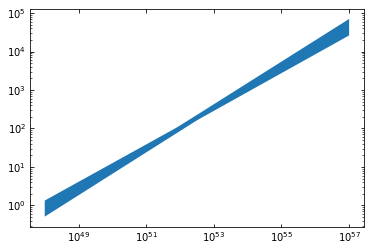

In [4]:
xLims = [48, 57]
yLims = [1, 4]
xline = np.logspace(xLims[0], xLims[1], 100)

# parameters from several different published Amati relations
params = [   [-26.978, 0.556], [-26.521, 0.550], [-26.732, 0.554], 
             [-23.200, 0.486], [-23.495, 0.490], [-26.08, 0.540], 
             [-24.000, 0.500], [-23.512, 0.490], [-26.597, 0.549], 
             [-25.046, 0.521]
         ]


ally = []
for par in params:
    yline = amati_relation(par[0], par[1], xline)
    ally.append(yline)

relations = pd.DataFrame(np.asmatrix(ally).T)
#relations['x'] = np.asarray(xline)

relation_limits = np.asarray([xline, relations.min(axis=1).tolist(), relations.max(axis=1).tolist()])

plt.fill_between(x=relation_limits[0,:], y1=relation_limits[1,:], y2=relation_limits[2,:])
plt.loglog()

In [ ]:
# dummy redshifts
redshifts = np.linspace(0.01, 20, 400)

cosmo_constants = {'hubble_constant': 67.8, 'matter_density': 0.308}

In [ ]:
plt.clf()
plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)
for fluence,epeak in zip(df1.flue_10k_10M_obsv, df1.epeak):
    xdata = calc_eiso(fluence=fluence, 
                      redshift=redshifts, 
                      cosmoconstants=cosmo_constants)
    ydata = epeak*(1.+redshifts)
    plt.plot(xdata, ydata, alpha=0.4)
plt.plot(df1.eiso_10k_10M_rest, df1.epeakRest, 'o', color='white', mew=1.5, mec='k')


# yline = np.logspace(0.1, 5, 100)
# xline = amati_relation(yint=47.93, epeakRest=yline, slope=2.04)
# plt.plot(xline, yline, color='k')

plt.xlim(1E48, 1E58)
plt.ylim(1E1, 1E5)
plt.loglog()
plt.show()
    
    

In [ ]:
# dummy redshifts
redshifts = np.linspace(0.01, 20, 400)

cosmo_constants = {'hubble_constant': 67.8, 'matter_density': 0.308}

For each of the relations, find the min and max y values at each value of x and then fill between those values. 

In [ ]:
df1.z.between(0, 1.23).sum(), df1.z.between(1.23, 2.15).sum(), df1.z.between(2.15, 100).sum()

In [ ]:
cond1 = df1.z.between(0, 1.23)

In [ ]:
cond2 = df1.z.between(1.23, 2.15)

In [ ]:
cond3 = df1.z.between(2.15, 100)

In [ ]:
df = df1[cond1]


xLims = [48, 57]
yLims = [1, 4]
xline = np.logspace(xLims[0], xLims[1], 100)

plt.clf()
plt.figure(figsize=(11,9))

plt.fill_between(x=relation_limits[0,:], y1=relation_limits[1,:], y2=relation_limits[2,:], alpha=0.35)


for fluence,epeak in zip(df.flue_10k_10M_obsv, df.epeak):
    xdata = calc_eiso(fluence=fluence, 
                      redshift=redshifts, 
                      cosmoconstants=cosmo_constants)
    ydata = epeak*(1.+redshifts)
    plt.plot(xdata, ydata, alpha=1)


plt.plot(df.eiso_10k_10M_rest, 
         df.epeakRest, 
         'o', color='white', mew=1.5, mec='k')

plt.loglog()
plt.xlim(*[float(10**(i)) for i in xLims])
plt.ylim(*[float(10**(i)) for i in yLims])
plt.legend(loc=0)
plt.show()

In [ ]:
df = df1[cond2]


xLims = [48, 57]
yLims = [1, 4]
xline = np.logspace(xLims[0], xLims[1], 100)

plt.clf()
plt.figure(figsize=(11,9))


plt.fill_between(x=relation_limits[0,:], y1=relation_limits[1,:], y2=relation_limits[2,:], alpha=0.35)


for fluence,epeak in zip(df.flue_10k_10M_obsv, df.epeak):
    xdata = calc_eiso(fluence=fluence, 
                      redshift=redshifts, 
                      cosmoconstants=cosmo_constants)
    ydata = epeak*(1.+redshifts)
    plt.plot(xdata, ydata, alpha=1)


plt.plot(df.eiso_10k_10M_rest, 
         df.epeakRest, 
         'o', color='white', mew=1.5, mec='k')

plt.loglog()
plt.xlim(*[float(10**(i)) for i in xLims])
plt.ylim(*[float(10**(i)) for i in yLims])
plt.legend(loc=0)
plt.show()

In [ ]:
df = df1[cond3]


xLims = [48, 57]
yLims = [1, 4]
xline = np.logspace(xLims[0], xLims[1], 100)

plt.clf()
plt.figure(figsize=(11,9))

plt.fill_between(x=relation_limits[0,:], y1=relation_limits[1,:], y2=relation_limits[2,:], alpha=0.35)


for fluence,epeak in zip(df.flue_10k_10M_obsv, df.epeak):
    xdata = calc_eiso(fluence=fluence, 
                      redshift=redshifts, 
                      cosmoconstants=cosmo_constants)
    ydata = epeak*(1.+redshifts)
    plt.plot(xdata, ydata, alpha=1)


plt.plot(df.eiso_10k_10M_rest, 
         df.epeakRest, 
         'o', color='white', mew=1.5, mec='k')

plt.loglog()
plt.xlim(*[float(10**(i)) for i in xLims])
plt.ylim(*[float(10**(i)) for i in yLims])
plt.legend(loc=0)
plt.show()

In [ ]:
df.shape

In [ ]:
df = df1[df1['eiso_10k_10M_rest'] < 1E53] # 13/34 GRBs out of 


xLims = [48, 57]
yLims = [1, 4]
xline = np.logspace(xLims[0], xLims[1], 100)

plt.clf()
plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


yline = amati_relation(-26.978, 0.556, xline)
plt.plot(xline, yline, color='k', label='my relation')

yline = amati_relation(-26.521, 0.550, xline)
plt.plot(xline, yline, color='k', ls='-', label='Gruber', alpha=0.7)

yline = amati_relation(-26.732, 0.554, xline)
plt.plot(xline, yline, color='k', ls='-', label='Nava', alpha=0.5)

yline = amati_relation(-23.200, 0.486, xline)
plt.plot(xline, yline, color='k', label='Heussaff', alpha=0.35)

yline = amati_relation(-23.495, 0.490, xline)
plt.plot(xline, yline, color='red', label='Amati 2006')

yline = amati_relation(2, 0.54, xline/1E52)
plt.plot(xline, yline, color='red', label='Amati 2009', alpha=0.75)

yline = amati_relation(-24.0, 0.5, xline)
plt.plot(xline, yline, color='red', label='Amati 20013 (rounded)', alpha=0.5)

yline = amati_relation(-23.512, 0.490, xline)
plt.plot(xline, yline, color='blue', label='Collazzi')

yline = amati_relation(-26.597, 0.549, xline)  # our inference of relation from plot
plt.plot(xline, yline, color='c', label='Amati 2013 plot, 153 GRBs')

yline = amati_relation(-25.046, 0.521, xline)  # our inference of relation from plot
plt.plot(xline, yline, color='cyan', label='Amati 2013, our fit to their 153 GRBs')


# yline = amati_relation(-26.978+(2*0.24), 0.556, xline)
# plt.plot(xline, yline, color='k', ls='--')

# yline = amati_relation(-26.978-(2*0.24), 0.556, xline)
# plt.plot(xline, yline, color='k', ls='--')


for fluence,epeak in zip(df.flue_10k_10M_obsv, df.epeak):
    xdata = calc_eiso(fluence=fluence, 
                      redshift=redshifts, 
                      cosmoconstants=cosmo_constants)
    ydata = epeak*(1.+redshifts)
    plt.plot(xdata, ydata, alpha=0.4)


plt.plot(df.eiso_10k_10M_rest, 
         df.epeakRest, 
         'o', color='white', mew=1.5, mec='k')
# plt.plot(df1.eiso_10k_10M_obsv, 
#          df1.epeakRest, 
#          'd', color='white', mew=1.5, mec='orange')

plt.loglog()
plt.xlim(*[float(10**(i)) for i in xLims])
plt.ylim(*[float(10**(i)) for i in yLims])
plt.legend(loc=0)
plt.show()

In [ ]:
# xline = np.logspace(48, 58, 100)

xLims = [48, 57]
yLims = [1, 4]
xline = np.logspace(xLims[0], xLims[1], 100)

plt.clf()
plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


yline = amati_relation(-26.978, 0.556, xline)
plt.plot(xline, yline, color='k', label='my relation')

yline = amati_relation(-26.521, 0.550, xline)
plt.plot(xline, yline, color='k', ls='--', label='Gruber', alpha=0.7)

yline = amati_relation(-26.732, 0.554, xline)
plt.plot(xline, yline, color='k', ls='-.', label='Nava', alpha=0.5)

# yline = amati_relation(-23.200, 0.486, xline)
# plt.plot(xline, yline, color='k', label='Heussaff', alpha=0.35)


# yline = amati_relation(-23.495, 0.490, xline)
# plt.plot(xline, yline, color='red', label='Amati 2006')

# yline = amati_relation(-23.512, 0.490, xline)
# plt.plot(xline, yline, color='blue', label='Collazzi')


# yline = amati_relation(-26.978+(2*0.24), 0.556, xline)
# plt.plot(xline, yline, color='k', ls='--')

# yline = amati_relation(-26.978-(2*0.24), 0.556, xline)
# plt.plot(xline, yline, color='k', ls='--')


# for fluence,epeak in zip(df.flue_10k_10M_obsv, df.epeak):
#     xdata = calc_eiso(fluence=fluence, 
#                       redshift=redshifts, 
#                       cosmoconstants=cosmo_constants)
#     ydata = epeak*(1.+redshifts)
#     plt.plot(xdata, ydata, alpha=0.4)


plt.plot(df.eiso_10k_10M_rest, 
         df.epeakRest, 
         'o', color='white', mew=1.5, mec='k')
# plt.plot(df1.eiso_10k_10M_obsv, 
#          df1.epeakRest, 
#          'd', color='white', mew=1.5, mec='orange')

plt.loglog()
plt.xlim(*[float(10**(i)) for i in xLims])
plt.ylim(*[float(10**(i)) for i in yLims])
plt.legend(loc=0)
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


yline = np.logspace(0.0001, 5, 100)
xline = amati_relation(yint=48.525, epeakRest=yline, slope=1.779)
plt.plot(xline, yline, color='k')

xline = amati_relation(yint=48.525+(2*0.24), epeakRest=yline, slope=1.779)
plt.plot(xline, yline, color='blue', ls='--')

xline = amati_relation(yint=48.525-(2*0.24), epeakRest=yline, slope=1.779)
plt.plot(xline, yline, color='red', ls='--')


# xline = amati_relation(yint=47.93, epeakRest=yline, slope=2.04)
# plt.plot(xline, yline, color='k')

# xline = amati_relation(yint=47.93+0.22, epeakRest=yline, slope=2.04)
# plt.plot(xline, yline, color='blue', ls='--')

# xline = amati_relation(yint=47.93-0.22, epeakRest=yline, slope=2.04)
# plt.plot(xline, yline, color='red', ls='--')

# plt.plot(xline, yline-(np.log10(0.22)), color='blue', ls='--')
# plt.plot(xline, yline+(np.log10(0.22)), color='red', ls='--')

plt.plot(df1.eiso_10k_10M_rest, 
         df1.epeakRest, 
         'o', color='white', mew=1.5, mec='k')

plt.loglog()
plt.xlim(10**48.525, 1E55)
plt.ylim(1, 1E4)
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


yline = np.logspace(0.1, 5, 100)
xline = amati_relation(yint=47.93, epeakRest=yline, slope=2.04)

plt.plot(np.log10(xline), np.log10(yline), color='k')

# plt.plot(np.log10(xline), np.log10(yline)-(10**0.22), color='blue', ls='--')
# plt.plot(np.log10(xline), np.log10(yline)+(10**0.22), color='red', ls='--')
plt.plot(np.log10(xline), np.log10(yline)-0.22, color='blue', ls='--')
plt.plot(np.log10(xline), np.log10(yline)+0.22, color='red', ls='--')

plt.plot(df1.eiso_10k_10M_rest.apply(np.log10), 
         df1.epeakRest.apply(np.log10), 
         'o', color='white', mew=1.5, mec='k')


plt.show()

In [ ]:
np.log10(yline)-(10**0.22)

In [ ]:
yline = np.logspace(0.1, 5, 100)
xline = amati_relation(yint=47.93, epeakRest=yline, slope=2.04)
scatter = [10**np.log10(yline)-(10**0.22), 
           10**np.log10(yline)+(10**0.22)]

In [ ]:
plt.clf()
plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)


plt.plot(xline, yline, color='k')
plt.plot(xline, scatter[0], color='blue', ls='--')
plt.plot(xline, scatter[1], color='red', ls='--')

# plt.plot(xline, yline-(10**0.22), color='blue', ls='--')
# plt.plot(xline, yline+(10**0.22), color='red', ls='--')


plt.xlim(1E48, 1E58)
plt.ylim(1E1, 1E5)
plt.loglog()
plt.show()

In [ ]:
# 71 pct of the observed flux are larger than the rest frame flux. 
print('%.1f'%((((df1.flux_10k_10M_obsv > df1.flux_10k_10M_rest).sum()/df1.shape[0])*100)))
# 71 pct of the observed flue are larger than the rest frame flue. 
print('%.1f'%((((df1.flue_10k_10M_obsv > df1.flue_10k_10M_rest).sum()/df1.shape[0])*100)))
# 71 pct of the observed Eiso are larger than the rest frame Eiso. 
print('%.1f'%((((df1.eiso_10k_10M_obsv > df1.eiso_10k_10M_rest).sum()/df1.shape[0])*100)))


In [ ]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)
plt.plot(df1['eiso_10k_10M_rest'], df1['epeakRest'], 'o', color='white', 
         mew=1.5, mec='navy')
plt.plot(df1['eiso_10k_10M_obsv'], df1['epeakRest'], 'o', color='white', 
         mew=1.5, mec='maroon', alpha=1)

plt.plot(df1['eiso_10k_10M_rest'], df1['epeak'], 'd', color='white', 
         mew=1.5, mec='dodgerblue')
plt.plot(df1['eiso_10k_10M_obsv'], df1['epeak'], 'd', color='white', 
         mew=1.5, mec='orange', alpha=1)

plt.minorticks_on()
plt.loglog()
plt.xlabel(r'$E_{iso}$')
plt.ylabel(r'$E_{pk}$')
plt.legend(loc=0)
plt.show()

In [ ]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)
plt.plot(df1['flue_10k_10M_rest'], df1['epeak'], 'o', color='white', 
         mew=1, mec='navy')
plt.plot(df1['flue_10k_10M_obsv'], df1['epeak'], 'o', color='red', alpha=0.5)
plt.minorticks_on()
plt.loglog()
plt.xlabel(r'$S$')
plt.ylabel(r'$E_{pk}$')
plt.legend(loc=0)
plt.show()

In [ ]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)
plt.plot(df1['eiso_10k_10M_rest'], df1['epeakRest'], 'o', color='white', 
         mew=1.5, mec='navy')
plt.plot(df1['eiso_10k_10M_obsv'], df1['epeakRest'], 'o', color='white', 
         mew=1.5, mec='maroon', alpha=1)

plt.plot(df1['eiso_10k_10M_rest'], df1['epeak'], 'd', color='white', 
         mew=1.5, mec='dodgerblue')
plt.plot(df1['eiso_10k_10M_obsv'], df1['epeak'], 'd', color='white', 
         mew=1.5, mec='orange', alpha=1)

plt.minorticks_on()
plt.loglog()
plt.xlabel(r'$E_{iso}$')
plt.ylabel(r'$E_{pk}$')
plt.legend(loc=0)
plt.show()

In [ ]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)
plt.plot(df1['flue_10k_10M_rest'], df1['epeakRest'], 'o', color='white', 
         mew=1, mec='navy')
plt.plot(df1['flue_10k_10M_obsv'], df1['epeak'], 'o', color='red', alpha=0.5)

# plt.xlim(0, 7)
# plt.ylim(1E7, 7E11)
plt.minorticks_on()
plt.loglog()
plt.xlabel(r'$S$')
plt.ylabel(r'$E^*_{pk}$')
plt.legend(loc=0)
plt.show()

In [ ]:
nRelations = 4

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()



for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()
    

Relations[1]['cosmology'] = {'hubble_constant': 74.0,'matter_density': 0.3}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47}
Relations[1]['pltkwArgs'] = {'color': 'black', 'label': 'Collazzi et al. (2012)'}

Relations[2]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
Relations[2]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[2]['pltkwArgs'] = {'color': 'red', 'label': 'Amati et al. (2006)'}

Relations[3]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
Relations[3]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[3]['pltkwArgs'] = {'color': 'goldenrod', 'label': 'Amati et al. (2006), my cosmo'}

Relations[4]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
Relations[4]['parameters'] = {'exponent': 1.802,'amplitude': 10**48.517} # 3.2885E48
Relations[4]['pltkwArgs'] = {'color': 'blue', 'label': 'Mine fit, my cosmo'}

# Relations[4]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
# Relations[4]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47} 
# Relations[4]['pltkwArgs'] = {'color': 'c', 'label': 'My Cosmo, Collazzi relation'}


plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)

for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

    
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='navy', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='dodgerblue', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='grey', alpha=0.5, label='Schaefer')

plt.xlim(0, 7)
plt.ylim(1E7, 7E11)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

# Different Hubble Constants ($H_0$) and Amplitudes (A)

In [ ]:
nRelations = 2

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()


for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()
    

Relations[1]['cosmology'] = {'hubble_constant': 74.0,'matter_density': 0.3}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47}
Relations[1]['pltkwArgs'] = {'color': 'black', 'label': 'Collazzi et al. (2012)'}

Relations[2]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
Relations[2]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[2]['pltkwArgs'] = {'color': 'red', 'label': 'Amati et al. (2006)'}


plt.clf()

plt.figure(figsize=(11,9))
max_ratios = []
for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    max_ratios.append(rel_max[1])
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
print('%.8E, %.3f pct, %.1f pct'%(difference, (difference/ratio_max)*100. , (difference/ratio_max)*100. ))

There are two differences between the above relations:
1. Collazzi $H_0=74$ and Amati's $H_0=65$
2. Collazzi $A=9.2\times10^{47}$ and Amati's $A=10^{47.93}$, but Collazzi's is a rounding error.

Collazzi's maximum allowed Epk/Sbolo ratio is lower than Amati's by 4.51162811e+08, or by 28.6% of Amati's maximum ratio. 

# Different Hubble Constants ($H_0$)
### Change Collazzi's amplitude to match Amati's, since it is a rounding error based on Amati's equation.  

In [ ]:
nRelations = 2

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()


for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()

Relations[1]['cosmology'] = {'hubble_constant': 74.0,'matter_density': 0.3}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # This is not what Collazzi reports for Amp.
Relations[1]['pltkwArgs'] = {'color': 'black', 'label': '$H_0=74$'}

Relations[2]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
Relations[2]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  
Relations[2]['pltkwArgs'] = {'color': 'red', 'label': '$H_0=65$'}


plt.clf()

plt.figure(figsize=(11,9))
max_ratios = []
for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    max_ratios.append(rel_max[1])
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
ratio_min = min(max_ratios)
ratio_ratio = (ratio_min/ratio_max)*100.
print('difference')
print('ratio of min/max in pct form')
print('diff/max in pct form')
print('diff/min in pct form')
print('--'*10)
print('%.8E, %.1f pct, %.1f pct, %.1f pct'%(difference, 
                                            ratio_ratio,
                                            (difference/ratio_max)*100. , 
                                            (difference/ratio_min)*100. ))

Comparing identical relations where the $H0$ differs. We use OmegaM=0.3 and H0=74 verses H0=65. We get a difference of 3.60126266E+08, or that an H0=74 is 22.8% lower than the ratio found for the H0=65.

Collazzi's maximum allowed Epk/Sbolo ratio is lower than Amati's by 3.3317083e+08, or by 22.845% of Amati's maximum ratio (when $A=9.2\times10^{47}$ is used). 

Collazzi's maximum allowed Epk/Sbolo ratio is lower than Amati's by 3.60126266e+08, or by 22.845% of Amati's maximum ratio (when $A=10^{47.93}$ is used). 

**Most of the difference in the maximum allowed Epk/Sbolo ratio is in the hubble constant that is used.**

```


```
# Different OmegaM

In [ ]:
nRelations = 2

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()


for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()

Relations[1]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.27}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93} 
Relations[1]['pltkwArgs'] = {'color': 'black', 'label': 'OmegaM=0.27'}

Relations[2]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.308}
Relations[2]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  
Relations[2]['pltkwArgs'] = {'color': 'red', 'label': 'OmegaM=0.308'}


plt.clf()

plt.figure(figsize=(11,9))
max_ratios = []
for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    max_ratios.append(rel_max[1])
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
ratio_min = min(max_ratios)
ratio_ratio = (ratio_min/ratio_max)*100.
print('difference')
print('ratio of min/max in pct form')
print('diff/max in pct form')
print('diff/min in pct form')
print('--'*10)
print('%.8E, %.1f pct, %.1f pct, %.1f pct'%(difference, 
                                            ratio_ratio,
                                            (difference/ratio_max)*100. , 
                                            (difference/ratio_min)*100. ))

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
print('%.8E, %.1f pct'%(difference, (difference/ratio_max)*100. ))

```


```
# Different Amplitudes
### The amplitude that Collazzi et al (2012) uses is due to rouding error from Amati et al (2006) relation. 
### Here is proof:
**We fit the Amati 2006 dataset ourselves (with $E_{pk}(1+z)$ as the dependent variable) and got** 
```
Intercept   -23.497926
Eiso          0.490248
```
**Which is:**

$ \displaystyle{{ \log_{10}(E_{pk}(1+z)) = -23.497926 + 0.490248 \log_{10}(E_{iso}) }} $

**And rounded to two decimal places (as is common) this becomes:**

$ \displaystyle{{ \log_{10}(E_{pk}(1+z)) = -23.50 + 0.49 \log_{10}(E_{iso}) }} $


**Now if we take this relation in solve for $\log_{10}(E_{iso})$ we get:**
```
-(yint/slope), 1./slope
(47.93067383825787, 2.0397831444917642)
```
$ \displaystyle{{ \log_{10}(E_{iso}) = 47.931 + 2.040  \log_{10}(E_{pk}(1+z)) }} $

**or**

$ \displaystyle{{ \log_{10}(E_{iso}) = 47.93 + 2.04  \log_{10}(E_{pk}(1+z)) }} $

**if we DON'T ROUND THE PARAMETERS.**

**If we round them first to:**

$ \displaystyle{{ \log_{10}(E_{pk}(1+z)) = -23.50 + 0.49 \log_{10}(E_{iso}) }} $

**and then rearrange the equation, we get**
```
-(-23.50/0.49), 1./0.49
(47.95918367346939, 2.0408163265306123)
```
$ \displaystyle{{ \log_{10}(E_{iso}) = 47.95918367346939 + 2.0408163265306123  \log_{10}(E_{pk}(1+z)) }} $

**or**

$ \displaystyle{{ \log_{10}(E_{iso}) = 47.96 + 2.04  \log_{10}(E_{pk}(1+z)) }} $


## This is where the difference in 47.93 and 47.96 comes from. 


## To look at only different amplitudies, we use H0=70 for both.

In [ ]:
nRelations = 2

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()


for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()
    

Relations[1]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47}
Relations[1]['pltkwArgs'] = {'color': 'black', 'label': 'Collazzi et al. (2012), H0=70'}

Relations[2]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
Relations[2]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[2]['pltkwArgs'] = {'color': 'red', 'label': 'Amati et al. (2006), H0=70'}


plt.clf()

plt.figure(figsize=(11,9))

max_ratios = []
for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    max_ratios.append(rel_max[1])
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
ratio_min = min(max_ratios)
ratio_ratio = (ratio_min/ratio_max)*100.
print('difference')
print('ratio of min/max in pct form')
print('diff/max in pct form')
print('diff/min in pct form')
print('--'*10)
print('%.8E, %.1f pct, %.1f pct, %.1f pct'%(difference, 
                                            ratio_ratio,
                                            (difference/ratio_max)*100. , 
                                            (difference/ratio_min)*100. ))

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
print('%.8E, %.3f pct, %.1f pct'%(difference, (difference/ratio_max)*100. , (difference/ratio_max)*100. ))

From the last comparison, we simply made both relation's hubble constants equal at H0=70. 
The rounding error has caused Collazzi's maximum ratio to be smaller than Amati's by 1.01737983e+08, which is 7.5% lower than Amati's. 
```
Difference between max ratio due to different amplitudes at 3 different hubble constants.
9.10365446e+07 for H0=74
1.01737983e+08 for H0=70
1.17991981e+08 for H0=65

All 3 return that Collazzi's max ratio is smaller than Amati's by 7.5% of Amati's max ratio.
```


# Difference in Relation (both amplitude and slope) 

In [ ]:
nRelations = 2

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()


for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()

# Relations[1]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
# Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
# Relations[1]['pltkwArgs'] = {'color': 'red', 'label': 'Amati et al. (2006), H0=70'}

# Relations[2]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308} 
# Relations[2]['parameters'] = {'exponent': 1.802,'amplitude': 10**48.517} # 3.2885E48
# Relations[2]['pltkwArgs'] = {'color': 'blue', 'label': 'Mine fit, my cosmo'}

Relations[1]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[1]['pltkwArgs'] = {'color': 'red', 'label': 'Amati et al. (2006), H0=70'}

Relations[2]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308} 
Relations[2]['parameters'] = {'exponent': 1.802,'amplitude': 10**48.517} # 3.2885E48
Relations[2]['pltkwArgs'] = {'color': 'blue', 'label': 'Mine fit, my cosmo'}


plt.clf()

plt.figure(figsize=(11,9))

max_ratios = []
for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    max_ratios.append(rel_max[1])
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

plt.xlim(0, 20)
plt.minorticks_on()

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
ratio_min = min(max_ratios)
ratio_ratio = (ratio_min/ratio_max)*100.
print('difference')
print('ratio of min/max in pct form')
print('diff/max in pct form')
print('diff/min in pct form')
print('--'*10)
print('%.8E, %.1f pct, %.1f pct, %.1f pct'%(difference, 
                                            ratio_ratio,
                                            (difference/ratio_max)*100. , 
                                            (difference/ratio_min)*100. ))

In [ ]:
difference = float( abs(np.diff([max_ratios])) )
ratio_max = max(max_ratios)
print('%.8E, %.3f pct, %.1f pct'%(difference, (difference/ratio_max)*100. , (difference/ratio_max)*100. ))

Our relation and cosmology returns a larger maximum $z=5.070$ compared to the $z=3.617$ of all the rest of the relations tested so far. The slope is what changes the maximum $z$ and the amplitude changes the maximum Epk/Sbolo ratio. 

We find our $z$ is larger and our Epk/Sbolo  ratio is smaller than Amati's by 1.02873787e+09, or 65.3% of Amati's. 

If we change our cosmology to match at H0=65 and OmegaM=0.3 we find our max z becomes 5.12 and our max ratio is smaller by 9.70048618e+08, or 61.5% of Amati's. 


If we change the cosmologies to match at H0=70 and OmegaM=0.3 we find our max z becomes 5.12 and our max ratio is smaller by 8.36419472e+08, or 61.5% of Amati's. 

If we change the cosmologies to match at H0=74 and OmegaM=0.3 we find our max z becomes 5.12 and our max ratio is smaller by 7.4843963e+08, or 61.5% of Amati's.


If I match H0=67.8 for both and use OmegaM=0.308 for mine and Omega=0.3 for Amati's, max z becomes 5.070 and our max ratio is smaller by 9.01223936e+08, or 62.2%. 

# Conclusions:
- 

# Plots with data

In [ ]:
nRelations = 4

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()



for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()
    

Relations[1]['cosmology'] = {'hubble_constant': 74.0,'matter_density': 0.3}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47}
Relations[1]['pltkwArgs'] = {'color': 'black', 'label': 'Collazzi et al. (2012)'}

Relations[2]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
Relations[2]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[2]['pltkwArgs'] = {'color': 'red', 'label': 'Amati et al. (2006)'}

Relations[3]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
Relations[3]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[3]['pltkwArgs'] = {'color': 'goldenrod', 'label': 'Amati et al. (2006), my cosmo'}

Relations[4]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
Relations[4]['parameters'] = {'exponent': 1.802,'amplitude': 10**48.517} # 3.2885E48
Relations[4]['pltkwArgs'] = {'color': 'blue', 'label': 'Mine fit, my cosmo'}

# Relations[4]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
# Relations[4]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47} 
# Relations[4]['pltkwArgs'] = {'color': 'c', 'label': 'My Cosmo, Collazzi relation'}


plt.clf()

plt.figure(figsize=(11,9))
#plt.grid(alpha=0.3)

for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

plt.xlim(0, 20)
#plt.ylim(1E7, 7E11)
plt.minorticks_on()

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
nRelations = 4

Relations = OrderedDict()
for i in range(1, nRelations+1):
    Relations[i] = OrderedDict()



for key in Relations.keys():
    Relations[key] = OrderedDict()
    Relations[key]['cosmology'] = OrderedDict()
    Relations[key]['parameters'] = OrderedDict()
    Relations[key]['pltkwArgs'] = OrderedDict()
    

Relations[1]['cosmology'] = {'hubble_constant': 74.0,'matter_density': 0.3}
Relations[1]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47}
Relations[1]['pltkwArgs'] = {'color': 'black', 'label': 'Collazzi et al. (2012)'}

Relations[2]['cosmology'] = {'hubble_constant': 65.0,'matter_density': 0.3}
Relations[2]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[2]['pltkwArgs'] = {'color': 'red', 'label': 'Amati et al. (2006)'}

Relations[3]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
Relations[3]['parameters'] = {'exponent': 2.04,'amplitude': 10**47.93}  # 8.511E47
Relations[3]['pltkwArgs'] = {'color': 'goldenrod', 'label': 'Amati et al. (2006), my cosmo'}

Relations[4]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
Relations[4]['parameters'] = {'exponent': 1.802,'amplitude': 10**48.517} # 3.2885E48
Relations[4]['pltkwArgs'] = {'color': 'blue', 'label': 'Mine fit, my cosmo'}

# Relations[4]['cosmology'] = {'hubble_constant': 67.8,'matter_density': 0.308}
# Relations[4]['parameters'] = {'exponent': 2.04,'amplitude': 9.2E47} 
# Relations[4]['pltkwArgs'] = {'color': 'c', 'label': 'My Cosmo, Collazzi relation'}


plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)

for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)
    plt.plot(redshifts, rel, **pltkwArgs)
    plt.axvline(rel_max[0], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max redshift
    plt.axhline(rel_max[1], 0, 1, ls='-.', color=pltkwArgs['color'], alpha=0.4)  # max ratio

    
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='navy', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='dodgerblue', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='grey', alpha=0.5, label='Schaefer')

plt.xlim(0, 7)
plt.ylim(1E7, 7E11)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
df2.z.max()

In [ ]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)

for i in range(1, nRelations+1):
    cosmo = Relations[i]['cosmology']
    pars = Relations[i]['parameters']
    pltkwArgs = Relations[i]['pltkwArgs']
    lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo)
    rel = epeak_sbolo_ratio(redshift=redshifts, 
                            lumdistance=lumdistances, 
                            exponent=pars['exponent'], 
                            amplitude=pars['amplitude'])
    rel_max = find_relation_max(redshifts=redshifts, data=rel)

# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)
plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

# H0 = 74
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
plt.plot(redshifts, AR_0, color='green', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_0_max[0], 0, 1, ls='-.', color='green', alpha=0.4)  # max redshift
plt.axhline(AR_0_max[1], 0, 1, ls='-.', color='green', alpha=0.4)  # max ratio


# H0 = 70
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.plot(redshifts, AR_1, color='red', label='$H_0$=70 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

# H0 = 65
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.plot(redshifts, AR_2, color='blue', label='$H_0$=65 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio



plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='k', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='red', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='c', alpha=0.9, label='Schaefer')


plt.xlim(0, 5)
plt.ylim(1E7, 7E11)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)

for 

# H0 = 74  With Collazzi et al Amplitude
AR_C_max = find_relation_max(redshifts=redshifts, data=AR_C)
plt.plot(redshifts, AR_C, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_C_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_C_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

# H0 = 74
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
plt.plot(redshifts, AR_0, color='green', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_0_max[0], 0, 1, ls='-.', color='green', alpha=0.4)  # max redshift
plt.axhline(AR_0_max[1], 0, 1, ls='-.', color='green', alpha=0.4)  # max ratio


# H0 = 70
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.plot(redshifts, AR_1, color='red', label='$H_0$=70 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

# H0 = 65
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.plot(redshifts, AR_2, color='blue', label='$H_0$=65 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio



plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='k', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='red', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='c', alpha=0.9, label='Schaefer')


plt.xlim(0, 5)
plt.ylim(1E7, 7E11)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

In [ ]:
cosmo_constants = [{'hubble_constant': 74.0,'matter_density': 0.3}, ]
exponents = [2.04, ]
amplitudes = [9.2E47, ]
pltkwArgs = [color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi', ]
                   


In [ ]:
plt.clf()

plt.figure(figsize=(11,9))
plt.grid(alpha=0.3)

# Collazzi et al (2012) relation with their stated cosmology. 
# c=2.04, A=9.2E47, H0 = 74, OmegaM = 0.3
AR   = epeak_sbolo_ratio(redshift=redshifts, 
                         lumdistance=Lum_Dist(redshift=redshifts, 
                                              cosmoconstants={'hubble_constant': 74.0,
                                                              'matter_density': 0.3}),
                         exponent=2.04, 
                         amplitude=9.2E47) 

AR_max = find_relation_max(redshifts=redshifts, data=AR)
plt.plot(redshifts, AR_max, color='k', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$, Collazzi')
plt.axvline(AR_max[0], 0, 1, ls='-.', color='k', alpha=0.4)  # max redshift
plt.axhline(AR_max[1], 0, 1, ls='-.', color='k', alpha=0.4)  # max ratio

# H0 = 74
AR_0_max = find_relation_max(redshifts=redshifts, data=AR_0)
plt.plot(redshifts, AR_0, color='green', label='$H_0$=74 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_0_max[0], 0, 1, ls='-.', color='green', alpha=0.4)  # max redshift
plt.axhline(AR_0_max[1], 0, 1, ls='-.', color='green', alpha=0.4)  # max ratio


# H0 = 70
AR_1_max = find_relation_max(redshifts=redshifts, data=AR_1)
plt.plot(redshifts, AR_1, color='red', label='$H_0$=70 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_1_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
plt.axhline(AR_1_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio

# H0 = 65
AR_2_max = find_relation_max(redshifts=redshifts, data=AR_2)
plt.plot(redshifts, AR_2, color='blue', label='$H_0$=65 km s$^{-1}$ Mpc$^{-1}$')
plt.axvline(AR_2_max[0], 0, 1, ls='-.', color='blue', alpha=0.4)  # max redshift
plt.axhline(AR_2_max[1], 0, 1, ls='-.', color='blue', alpha=0.4)  # max ratio



plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_obsv'], 'o', color='k', label='obsv')
plt.plot(df1['z'], (df1['epeak']**2.04)/df1['flue_1k_10M_rest'], 'o', color='red', alpha=0.6, label='rest')
plt.plot(df2['z'], (df2['epeak']**2.04)/df2['sbolo'], 'd', color='c', alpha=0.9, label='Schaefer')


plt.xlim(0, 5)
plt.ylim(1E7, 7E11)
plt.minorticks_on()

plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.legend(loc=0)
plt.show()

## Trying Different Amati Relations

## sources:
#### 1) Amati et al. (2002). 
12 GRBs with z. BeppoSAX(2-700 keV). Band fn. 1-10000 keV for Eiso, H0=65, OmegaM=0.3, OmegaL=0.7.  
$E_{pk} \propto E_{iso}^{0.52}$

#### 2) Amati et al. (2006)
41 GRBs/XRFs with z. Band fn. 1-10000 keV for Eiso, H0=65, OmegaM=0.3, OmegaL=0.7.

$E^*_{pk} = 77 E_{iso}^{0.57}$ which is also $\log_{10}(E^*_{pk}) = 1.8865 + 0.57 \log_{10}(E_{iso})$ (without accouting for sample variance). 

$E^*_{pk} = 95 E_{iso}^{0.49}$ which is also $\log_{10}(E^*_{pk}) = 1.9777 + 0.49 \log_{10}(E_{iso})$ (when accouting for sample variance). 

When I fit his data I get $\log_{10}(E^*_{pk}) = 1.995 + 0.4902  \log_{10}(E_{iso}/10^{52})$

Both round to $\log_{10}(E^*_{pk}) = 2.0 + 0.49  \log_{10}(E_{iso}/10^{52})$

My fit to the data with EpeakRest as the dependent variable and rearranging to solve for Eiso gives me:  $ \displaystyle{{ \log_{10}(E_{iso}) = 47.931 + 2.040  \log_{10}(E_{pk}(1+z)) }} $
Notice this is the equation that Collazzi et al uses. 






In [ ]:
yints = [47.96, 47.93, 48.296, 48.434, 48.063, 48.517, 48.0]
slopes = [2.04, 2.04, 1.852, 1.821, 1.919, 1.802, 2.0]

In [ ]:
cosmo_constants = {'hubble_constant': 70,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint)

    AR_max = find_relation_max(redshifts=redshifts, data=AR)


**The maximum redshift depends on the relation used.**

In [ ]:
cosmo_constants = {'hubble_constant': 67.8,
                     'matter_density': 0.308} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)


plt.clf()

plt.figure(figsize=(9,6))
plt.grid(alpha=0.3)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint)
    
    plt.plot(redshifts, AR, color='red')
    AR_max = find_relation_max(redshifts=redshifts, data=AR)
    plt.axvline(AR_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
    plt.axhline(AR_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio
plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()

In [ ]:
cosmo_constants = {'hubble_constant': 74,
                     'matter_density': 0.3} 
lumdistances = Lum_Dist(redshift=redshifts, cosmoconstants=cosmo_constants)


plt.clf()

plt.figure(figsize=(9,6))
plt.grid(alpha=0.3)

for yint,slope in zip(yints,slopes):
    AR = epeak_sbolo_ratio(redshift=redshifts, 
                      lumdistance=lumdistances, 
                      exponent=slope, 
                      amplitude=10**yint)
    
    plt.plot(redshifts, AR, color='red')
    AR_max = find_relation_max(redshifts=redshifts, data=AR)
    plt.axvline(AR_max[0], 0, 1, ls='-.', color='red', alpha=0.4)  # max redshift
    plt.axhline(AR_max[1], 0, 1, ls='-.', color='red', alpha=0.4)  # max ratio
plt.xlim(0, 20)
plt.minorticks_on()
plt.xlabel(r'$z$')
plt.ylabel(r'$E_{pk}/S_{bolo}$ ratio')
plt.show()